# Predicting the Species of Iris Flowers

----
## Part I. Exploratory Data Analysis

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `iris_data.csv` found in the [data](data/) directory.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('notebook')

### Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [2]:
filepath = "data/iris_data.csv"
data = pd.read_csv(filepath)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Number of rows
print(data.shape[0])

150


In [4]:
# Column names
data.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [5]:
# Data types
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [6]:
# data['species'] = data.species.str.replace('Iris-', '')
data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [7]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


### Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [9]:
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [10]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [11]:
# applying multiple functions at once - 2 methods
data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [12]:
# If certain fields need to be aggregated differently, we can do:
agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

### Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

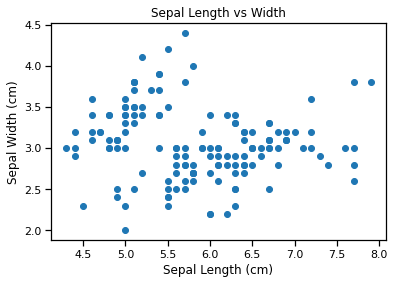

In [13]:
# A simple scatter plot with Matplotlib
ax = plt.axes()
ax.scatter(data.sepal_length, data.sepal_width)
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

### Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

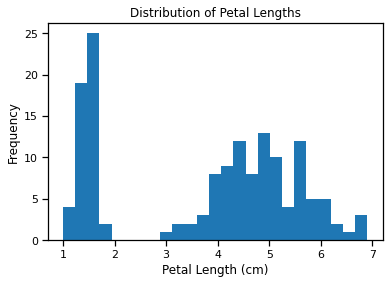

In [14]:
ax = plt.axes()
ax.hist(data.petal_length, bins=25);
ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

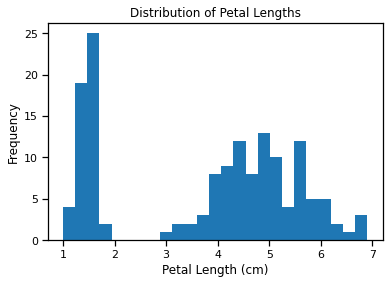

In [15]:
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)
ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

### Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

Text(0.5, 0, 'Size (cm)')

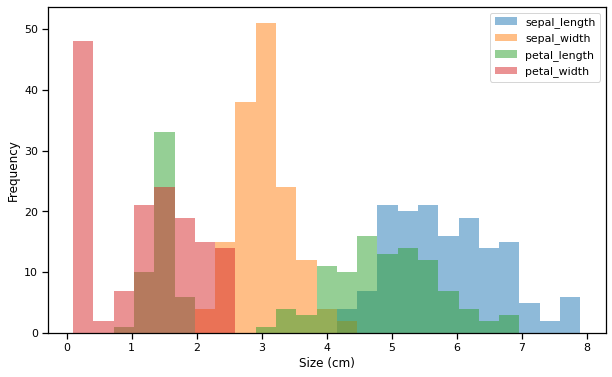

In [16]:
ax = data.plot.hist(bins=25, alpha=0.5, figsize=(10,6))
ax.set_xlabel('Size (cm)')

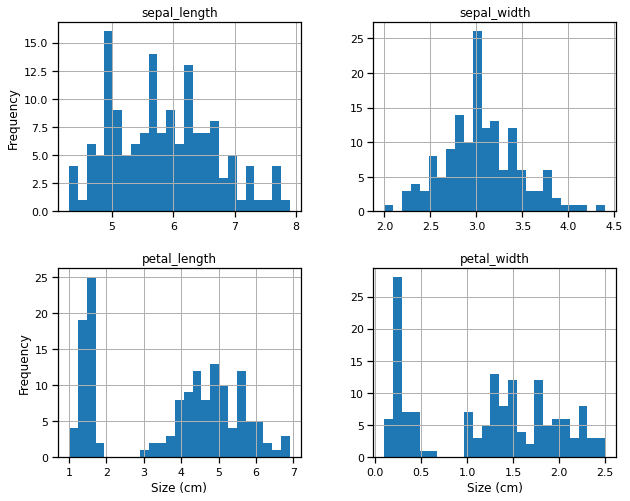

In [17]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25, figsize=(10,8))

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

### Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

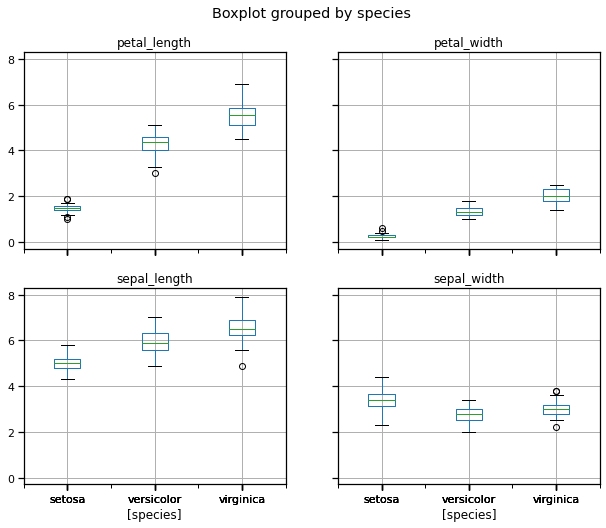

In [18]:
data.boxplot(by='species', figsize=(10,8))

### Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [19]:
# Reshape the data so there is only a single measurement in each column
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'}))
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


<AxesSubplot:xlabel='measurement', ylabel='size'>

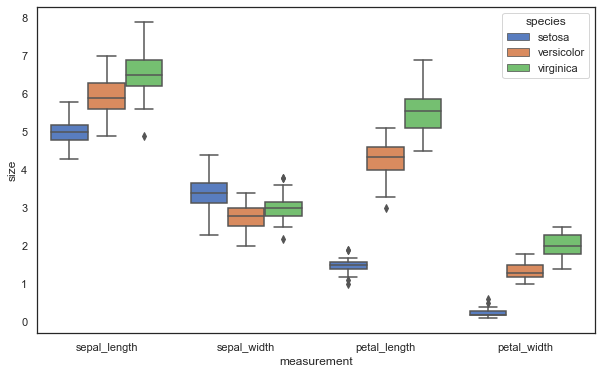

In [20]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('muted')
plt.figure(figsize=(10,6))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data)

### Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

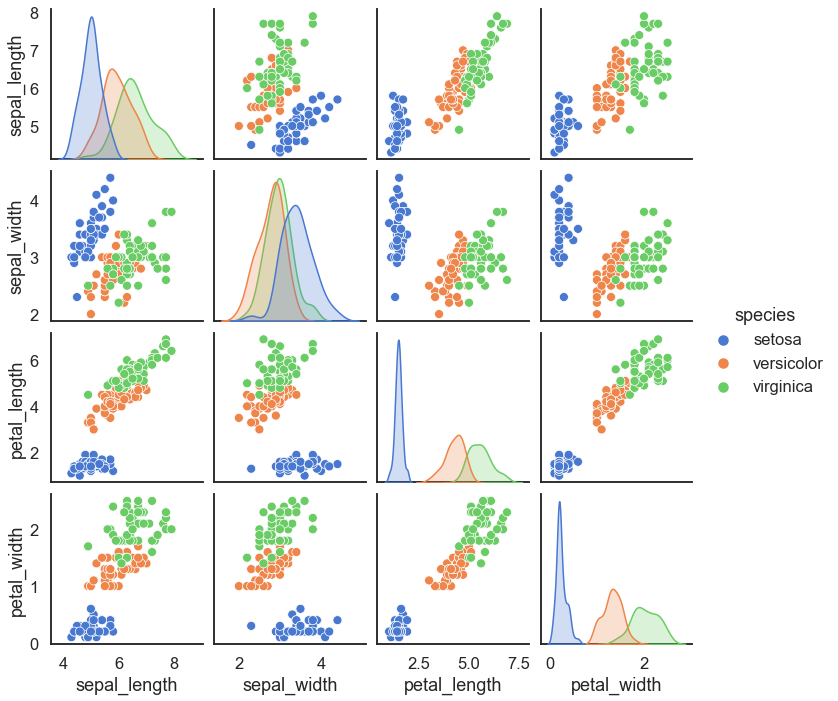

In [21]:
sns.set_context('talk')
sns.pairplot(data, hue='species')

#### Correlation Matrix

<AxesSubplot:>

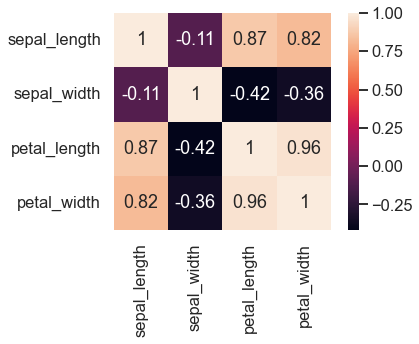

In [22]:
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True)

---
## Part II. Predicting the species of the iris flower

There are three species of the iris flower that we would like to predict using the petal and sepal features.

![iris](https://miro.medium.com/max/1050/0*Uw37vrrKzeEWahdB)

In [23]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [24]:
x = data.iloc[:,:-1]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y = pd.factorize(data['species'])[0]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)
print("Train shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train shape: (105, 4) (105,)
Test set shape: (45, 4) (45,)


In [26]:
# Setting up plotting functions

def plot_confusion_matrix(y_test, y_preds, title):
    
    classes=['Setosa','Versicolor', 'Virginica']
    
    cm = confusion_matrix(y_test, y_preds)
    
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    
    sns.set_context('notebook') #paper, notebook, talk, poster
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_title(title)
    ax.set_xlabel('\nPredicted Species')
    ax.set_ylabel('Actual Species\n')
    ax.xaxis.set_ticklabels(classes)
    ax.yaxis.set_ticklabels(classes)
    plt.show()
    
def plot_roc(y_test, y_probs, title):
    fpr = {}
    tpr = {}
    roc_auc = {}
    thresh = {}
    classes = 3

    for i in range(classes):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_probs[:,i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = ['salmon', 'teal', 'slateblue']
    species = ['Setosa' if i == 0 else 'Versicolor' if i == 1 else 'Virginica' for i in range(classes)]
    
    sns.set_style('whitegrid')
    plt.figure(figsize=(9,6))
    for i, color in zip(range(classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2.5, alpha=0.8,
                 label='ROC Curve of {0} (AUC = {1:0.3f})'.format(species[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.title(title, fontsize=18)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive rate', fontsize=14)
    plt.legend(loc='best', fontsize=14)
    plt.show()

## Logistic Regression

Test Set Accuracy: 93.3%


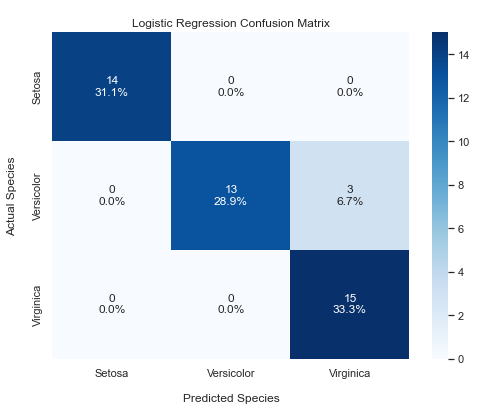

In [27]:
glm=LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train, y_train)
glm_preds=glm.predict(X_test)
glm_probs=glm.predict_proba(X_test)
glm_acc=accuracy_score(y_test,glm_preds)
print("Test Set Accuracy: {:.1%}".format(glm_acc))
plot_confusion_matrix(y_test, y_preds=glm_preds, title='\nLogistic Regression Confusion Matrix')

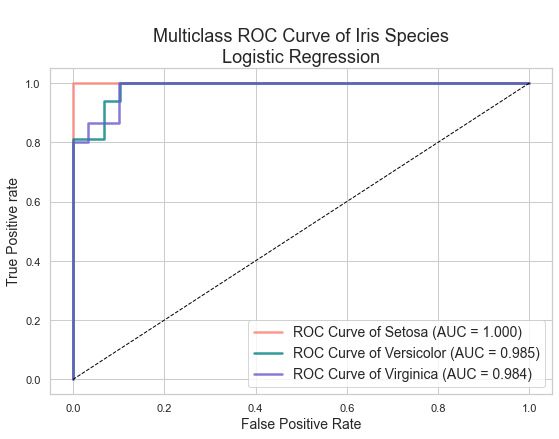

In [28]:
plot_roc(y_test, y_probs=glm_probs, title='\nMulticlass ROC Curve of Iris Species\nLogistic Regression')

## Linear Discriminant Analysis

Test Set Accuracy: 95.6%


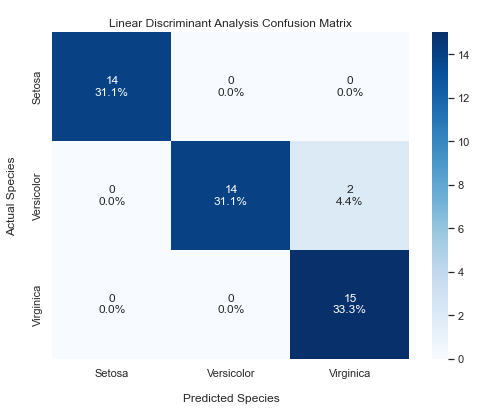

In [29]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
lda_preds=lda.predict(X_test)
lda_probs=lda.predict_proba(X_test)
lda_acc=accuracy_score(y_test,lda_preds)
print("Test Set Accuracy: {:.1%}".format(lda_acc))
plot_confusion_matrix(y_test, y_preds=lda_preds, title='\nLinear Discriminant Analysis Confusion Matrix')

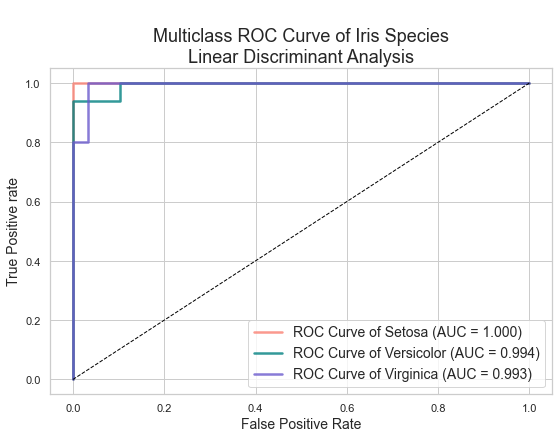

In [30]:
plot_roc(y_test, y_probs=lda_probs, title='\nMulticlass ROC Curve of Iris Species\nLinear Discriminant Analysis')

## Linear Support Vector Machine

Test Set Accuracy: 97.8%


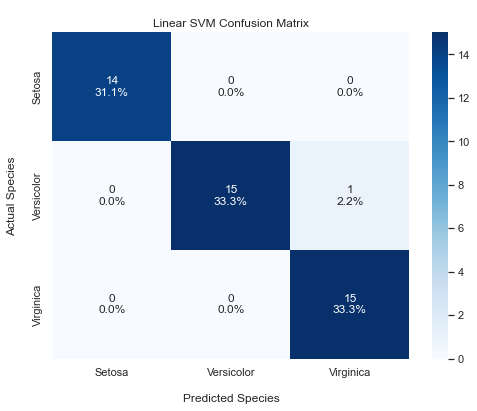

In [31]:
svm = SVC(kernel='linear', C=1.2, probability=True).fit(X_train, y_train)
svm_preds=svm.predict(X_test)
svm_probs=svm.predict_proba(X_test)
svm_acc=accuracy_score(y_test,svm_preds)
print("Test Set Accuracy: {:.1%}".format(svm_acc))
plot_confusion_matrix(y_test, y_preds=svm_preds, title='\nLinear SVM Confusion Matrix')

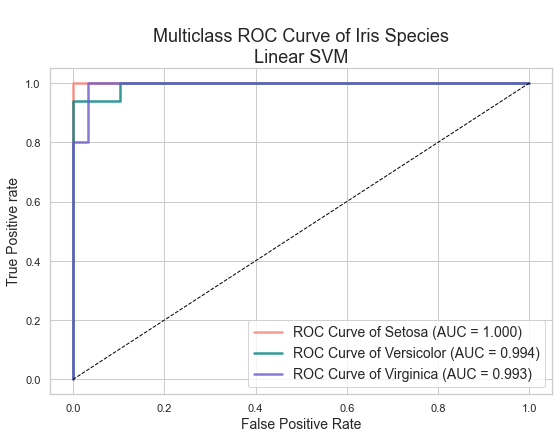

In [32]:
plot_roc(y_test, y_probs=svm_probs, title='\nMulticlass ROC Curve of Iris Species\nLinear SVM')

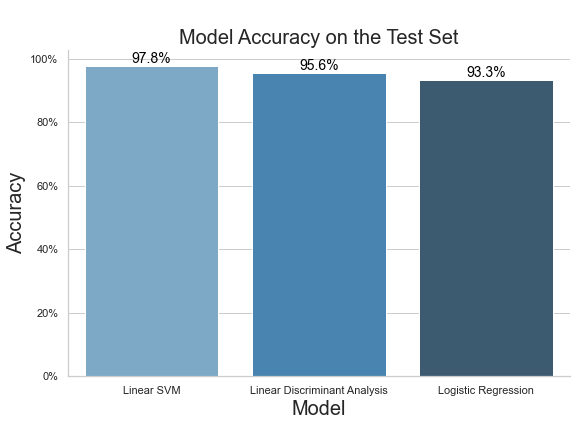

In [33]:
data = {'Accuracy': [glm_acc, lda_acc, svm_acc]}
res = pd.DataFrame(data, index=['Logistic Regression', 'Linear Discriminant Analysis', 
                                'Linear SVM']).sort_values(by=['Accuracy'], ascending=False)
plt.figure(figsize=(9,6))
ax=sns.barplot(x=res.index, y='Accuracy', data=res, palette='Blues_d')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x*100)))
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()*100), (p.get_x()+0.4, p.get_height()), 
                ha='center', va='bottom', color= 'black', fontsize=14)
plt.title('\nModel Accuracy on the Test Set', fontsize=20)
plt.show()

Overall, the Linear SVM produced the highest accuracy at 97.8% with an Area Under the Curve of more than 0.99 for each of the species. It also misclassified the fewest number of flowers in the confusion matrix.

---
##### Machine Learning Foundation (C) 2020 IBM Corporation